# Human Body Dimension Estimation (HBDE) from occluded images

### Authors: M. Beiwinkler, M. Krimpelstätter, I. Viertola and T. Wulz

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import json
import os
import glob
from skimage.io import imread

%matplotlib inline

In [17]:
# Paths
DATASET_PATH = os.path.join(os.getcwd(), "dataset")
TRAIN_TEST_PATH = os.path.join(DATASET_PATH, os.path.join("train_test", "train_test_split.json"))
IMS_PATH = os.path.join(DATASET_PATH, os.path.join("synthetic_images", "200x200"))

if not os.path.exists(IMS_PATH):
    print("Dataset does not exist {}".format(DATASET_PATH))
    exit()

## Data preparation

In [40]:
# Train/test split by img indices
f = open(TRAIN_TEST_PATH, "r")
train_test_split = json.load(f)
f.close()

# Load data
im_data = []
for fn in sorted(glob.glob(os.path.join(IMS_PATH, os.path.join("**", "*.png")), recursive=True)):
    img = imread(fn)
    img = img.astype('float32')
    img /= 255.0
    im_data.append(img)

im_data = np.array(im_data)

if not im_data.shape == (12000, 200, 200):
    print("Problems with image data.")
    exit()

(<AxesSubplot:title={'center':'Male, pose 1'}>,
 Text(0.5, 1.0, 'Male, pose 1'))

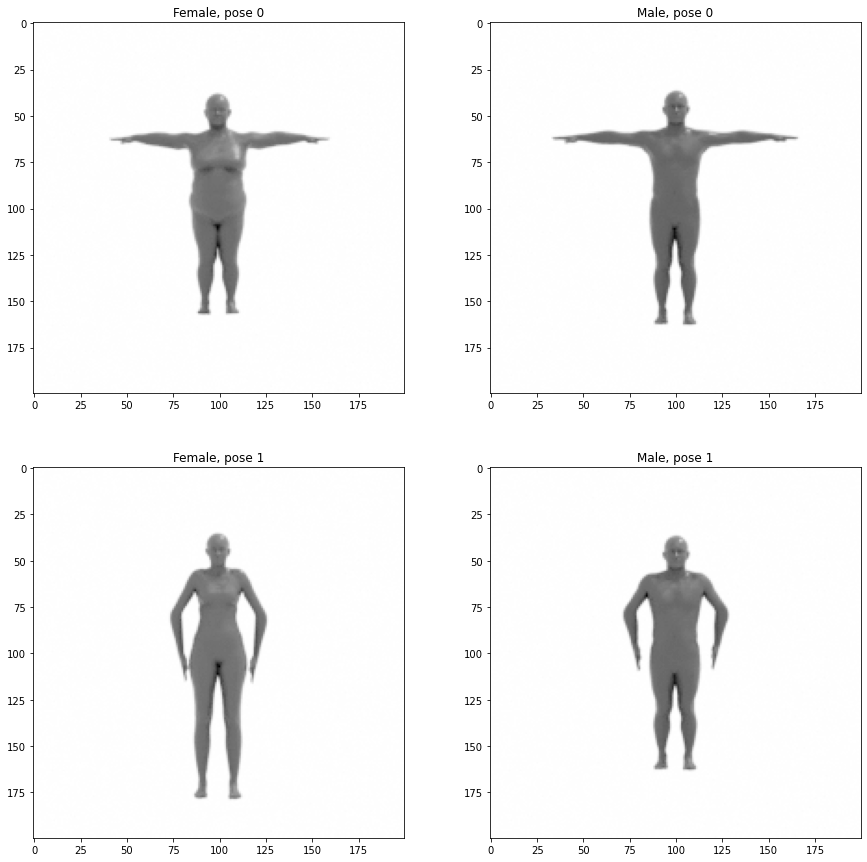

In [44]:
# Review data
plt.figure(figsize=(15, 15))
plt.subplot(221), plt.imshow(im_data[0], cmap='gray'), plt.title("Female, pose 0")
plt.subplot(222), plt.imshow(im_data[3001], cmap='gray'), plt.title("Male, pose 0")
plt.subplot(223), plt.imshow(im_data[6001], cmap='gray'), plt.title("Female, pose 1")
plt.subplot(224), plt.imshow(im_data[9001], cmap='gray'), plt.title("Male, pose 1")

# Generate occluded images